# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

In [10]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [14]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
iris_df['species'] = iris_data.target


# Display the DataFrame
iris_df

#Your code here ... 

print(iris_df.info())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


150 rows x 5 columns

#### **Question 2:** 
#### Data-visualization

Create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


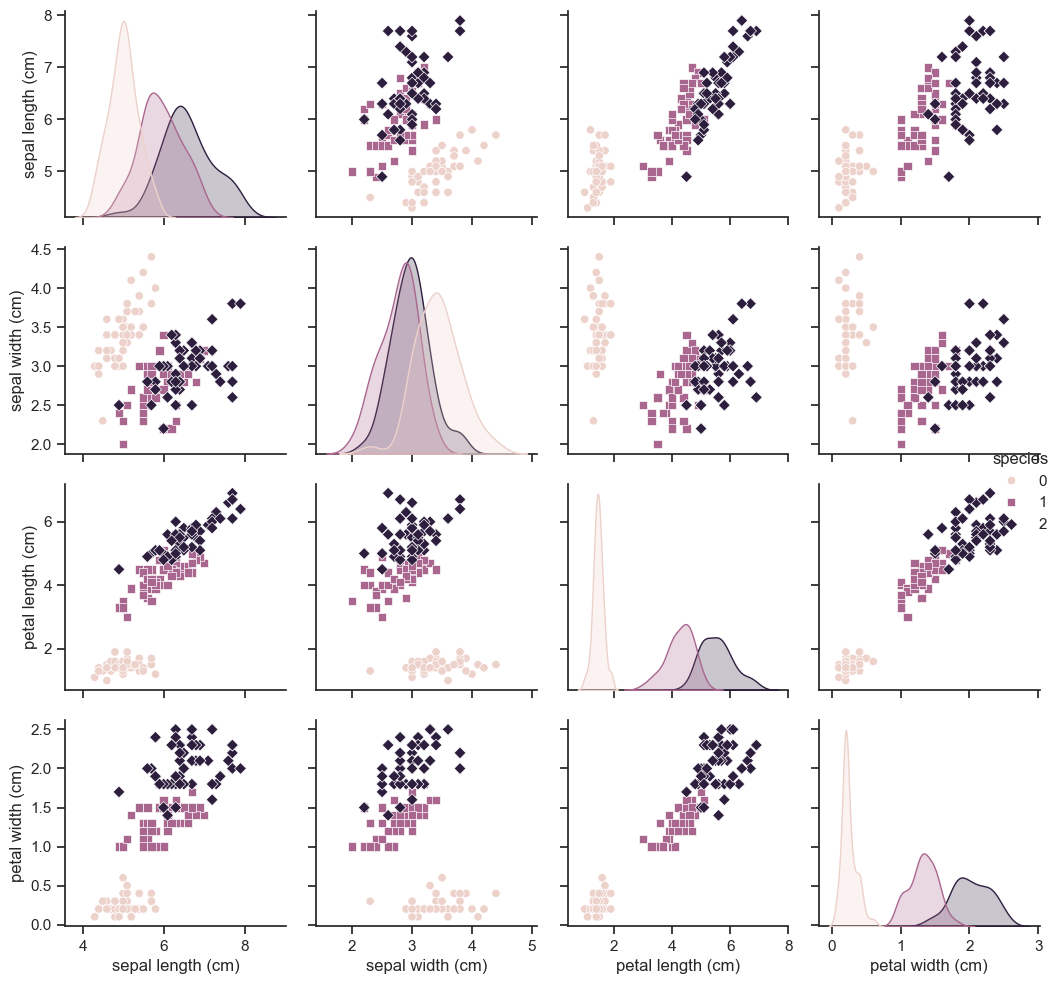

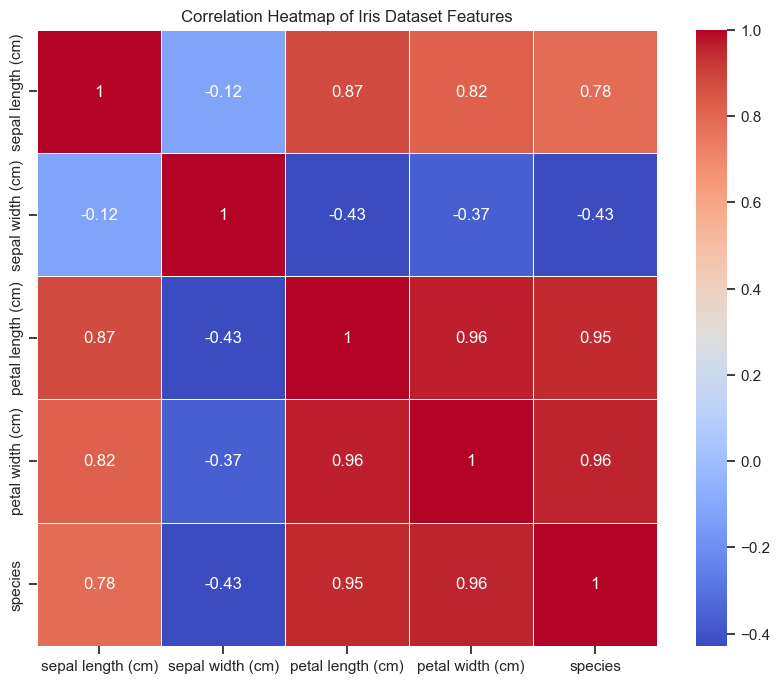

In [1]:
# Your code here ...

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Set up the scatter plot matrix
sns.set(style="ticks")
sns.pairplot(iris_df, hue="species", diag_kind="kde", markers=["o", "s", "D"])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset Features")
plt.show()

#### **Question 3:** 
#### Data cleaning

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the species column)
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Add the species column back to the scaled DataFrame
scaled_iris_df['species'] = iris_df['species'].values

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

# Display summary statistics of the scaled DataFrame
print("\nSummary statistics of the scaled features:")
print(scaled_iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Summary statistics of the scaled features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5

Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

Standardizing features before applying K-Means clustering is crucial because it ensures all features contribute equally to distance calculations, preventing features with larger scales from dominating the clustering process. Unstandardized data can lead to biased results, misrepresentation of feature importance, and inconsistent clustering outcomes, as features with larger magnitudes will disproportionately influence the algorithm's decisions. Moreover, standardization often improves the algorithm's convergence speed and stability, enhances the interpretability of cluster centers, and facilitates more effective hyperparameter tuning, ultimately resulting in more reliable and meaningful clustering results.

#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [7]:
# Your code here ...

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize the features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_scaled)

# Add cluster labels to the original DataFrame
iris_df['Cluster'] = kmeans.labels_

# Add the actual species names for comparison
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the updated DataFrame
print(iris_df.head(10))

# Display summary of clustering results
print("\nClustering Results Summary:")
print(iris_df.groupby(['Species', 'Cluster']).size().unstack(fill_value=0))

# Calculate clustering accuracy
correct_clusters = sum(iris_df.groupby('Species')['Cluster'].apply(lambda x: x.value_counts().max()))
accuracy = correct_clusters / len(iris_df)
print(f"\nClustering Accuracy: {accuracy:.2%}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   Cluster Species  
0        1  setosa  
1        2  setosa  
2        2  setosa  
3        2  setosa  
4        1  setosa  
5   

/var/folders/v2/3kvz36y16hg4ry1svvl61dmm0000gn/T/ipykernel_73967/994462831.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(iris_df.groupby(['Species', 'Cluster']).size().unstack(fill_value=0))
/var/folders/v2/3kvz36y16hg4ry1svvl61dmm0000gn/T/ipykernel_73967/994462831.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correct_clusters = sum(iris_df.groupby('Species')['Cluster'].apply(lambda x: x.value_counts().max()))


Discuss the results of the K-Means clustering. How well did the clusters match the true species?

The K-Means clustering algorithm performed  well in matching the true Iris species, achieving an overall accuracy of 89.33%. It perfectly separated the setosa species into its own cluster, demonstrating that setosa is distinctly different from the other two species in terms of its features. However, there was some overlap between versicolor and virginica in the other two clusters, with one cluster capturing 96% of versicolor samples and the other capturing 72% of virginica samples. 

#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

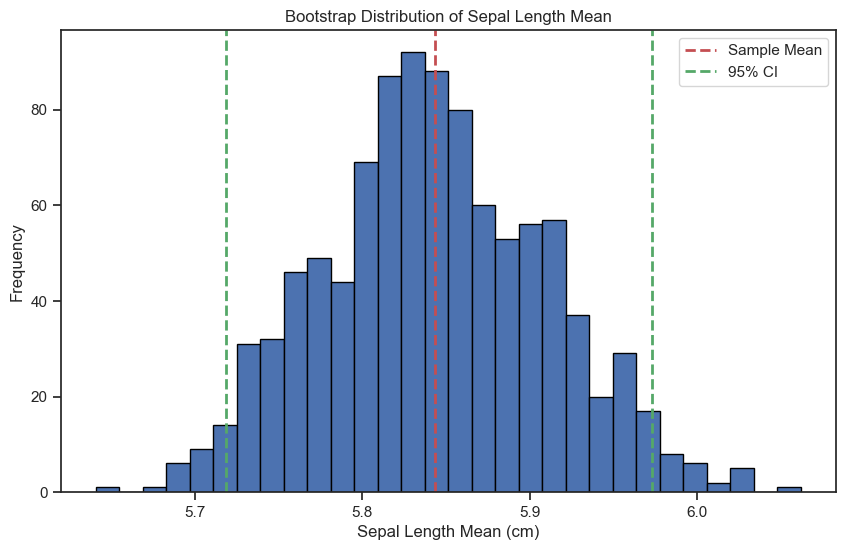

Original Sample Mean: 5.8433 cm
Bootstrap Mean: 5.8430 cm
95% Confidence Interval: (5.7187, 5.9733) cm
Standard Error: 0.0672 cm


In [8]:
# Your code here ...
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Function to calculate mean of a bootstrap sample
def bootstrap_mean(data, size=None):
    return np.mean(np.random.choice(data, size=size, replace=True))

# Set up bootstrapping
n_bootstrap = 1000
sepal_length = iris_df['sepal length (cm)']
bootstrap_means = np.zeros(n_bootstrap)

# Perform bootstrapping
for i in range(n_bootstrap):
    bootstrap_means[i] = bootstrap_mean(sepal_length, size=len(sepal_length))

# Calculate confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='black')
plt.axvline(np.mean(sepal_length), color='r', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.axvline(confidence_interval[0], color='g', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(confidence_interval[1], color='g', linestyle='dashed', linewidth=2)
plt.xlabel('Sepal Length Mean (cm)')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Sepal Length Mean')
plt.legend()
plt.show()

# Print results
print(f"Original Sample Mean: {np.mean(sepal_length):.4f} cm")
print(f"Bootstrap Mean: {np.mean(bootstrap_means):.4f} cm")
print(f"95% Confidence Interval: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}) cm")
print(f"Standard Error: {np.std(bootstrap_means):.4f} cm")

Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the selected variable appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
